In [3]:
import pandas as pd
from sklearn import tree
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

In [6]:
heart_dis = pd.read_csv('./HeartDiseaseData.csv')
heart_dis.head(10)

,Unnamed: 0,ID,Age,Sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,num,Place
0,1,1,28,male,atypical angina,130.0,132.0,False,showing probable or definite left ventricular ...,185.0,no,0.0,0,Hungary
1,2,2,29,male,atypical angina,120.0,243.0,False,normal,160.0,no,0.0,0,Hungary
2,3,3,29,male,atypical angina,140.0,NaN,False,normal,170.0,no,0.0,0,Hungary
3,4,4,30,female,typical angina,170.0,237.0,False,having ST-T wave abnormality (T wave inversion...,170.0,no,0.0,0,Hungary
4,5,5,31,female,atypical angina,100.0,219.0,False,having ST-T wave abnormality (T wave inversion...,150.0,no,0.0,0,Hungary
5,6,6,32,female,atypical angina,105.0,198.0,False,normal,165.0,no,0.0,0,Hungary
6,7,7,32,male,atypical angina,110.0,225.0,False,normal,184.0,no,0.0,0,Hungary
7,8,8,32,male,atypical angina,125.0,254.0,False,normal,155.0,no,0.0,0,Hungary
8,9,9,33,male,non-anginal pain,120.0,298.0,False,normal,185.0,no,0.0,0,Hungary
9,10,10,34,female,atypical angina,130.0,161.0,False,normal,190.0,no,0.0,0,Hungary


In [ ]:
#Посмотрим на датафрейм

In [7]:
heart_dis.dtypes

Unnamed: 0      int64
ID              int64
Age             int64
Sex            object
cp             object
trestbps      float64
chol          float64
fbs            object
restecg        object
thalach       float64
exang          object
oldpeak       float64
num             int64
Place          object
dtype: object

In [8]:
heart_dis.shape

(457, 14)

In [9]:
heart_dis.describe()

,Unnamed: 0,ID,Age,trestbps,chol,thalach,oldpeak,num
count,457.000000,457.000000,457.000000,424.000000,431.000000,424.000000,421.000000,457.000000
mean,229.000000,229.000000,50.962801,131.488208,200.048724,134.910377,0.622090,0.459519
std,132.068795,132.068795,9.219588,18.829454,113.463794,24.251177,0.922115,0.498905
min,1.000000,1.000000,28.000000,80.000000,0.000000,69.000000,-2.600000,0.000000
25%,115.000000,115.000000,45.000000,120.000000,171.000000,118.000000,0.000000,0.000000
50%,229.000000,229.000000,52.000000,130.000000,220.000000,135.000000,0.000000,0.000000
75%,343.000000,343.000000,57.000000,140.000000,269.500000,150.000000,1.000000,1.000000
max,457.000000,457.000000,75.000000,200.000000,603.000000,190.000000,5.000000,1.000000


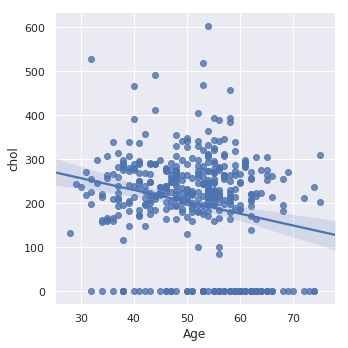

In [10]:
sns.lmplot(x='Age', y='chol', data=heart_dis)

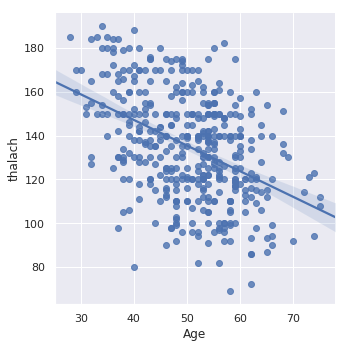

In [11]:
sns.lmplot(x='Age', y='thalach', data=heart_dis)

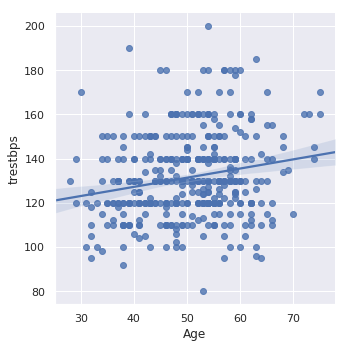

In [13]:
sns.lmplot(x='Age', y='trestbps', data=heart_dis)

In [ ]:
#Отредактируем наш датафрейм для построения дерева

In [14]:
heart_dis.isnull().sum()

Unnamed: 0     0
ID             0
Age            0
Sex            0
cp             0
trestbps      33
chol          26
fbs           54
restecg        2
thalach       33
exang         33
oldpeak       36
num            0
Place          0
dtype: int64

In [15]:
heart_dis_red = heart_dis.drop(['Unnamed: 0', 'ID'], axis = 1)

In [16]:
heart_dis_red.head()

,Age,Sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,num,Place
0,28,male,atypical angina,130.0,132.0,False,showing probable or definite left ventricular ...,185.0,no,0.0,0,Hungary
1,29,male,atypical angina,120.0,243.0,False,normal,160.0,no,0.0,0,Hungary
2,29,male,atypical angina,140.0,NaN,False,normal,170.0,no,0.0,0,Hungary
3,30,female,typical angina,170.0,237.0,False,having ST-T wave abnormality (T wave inversion...,170.0,no,0.0,0,Hungary
4,31,female,atypical angina,100.0,219.0,False,having ST-T wave abnormality (T wave inversion...,150.0,no,0.0,0,Hungary


In [17]:
heart_dis_tree_ver = heart_dis_red.fillna({'trestbps': heart_dis_red.trestbps.median(), 'chol': heart_dis_red.chol.median(), 'thalach': heart_dis_red.thalach.median(), 'oldpeak': heart_dis_red.oldpeak.median()})

In [18]:
heart_dis_tree_ver = heart_dis_tree_ver.dropna(axis = 0)
heart_dis_tree_ver.isnull().sum()

Age         0
Sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
num         0
Place       0
dtype: int64

In [19]:
x = heart_dis_tree_ver.drop('num', axis=1)
y = heart_dis_tree_ver.num

In [21]:
x = pd.get_dummies(x)
x.shape

(369, 21)

In [49]:
tree_of_hearts = tree.DecisionTreeClassifier(criterion='entropy')
tree_of_hearts.fit(x, y)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [50]:
tree_of_hearts.score(x, y)

1.0

In [51]:
from IPython.display import SVG
from graphviz import Source
from IPython.display import display
from IPython.display import HTML

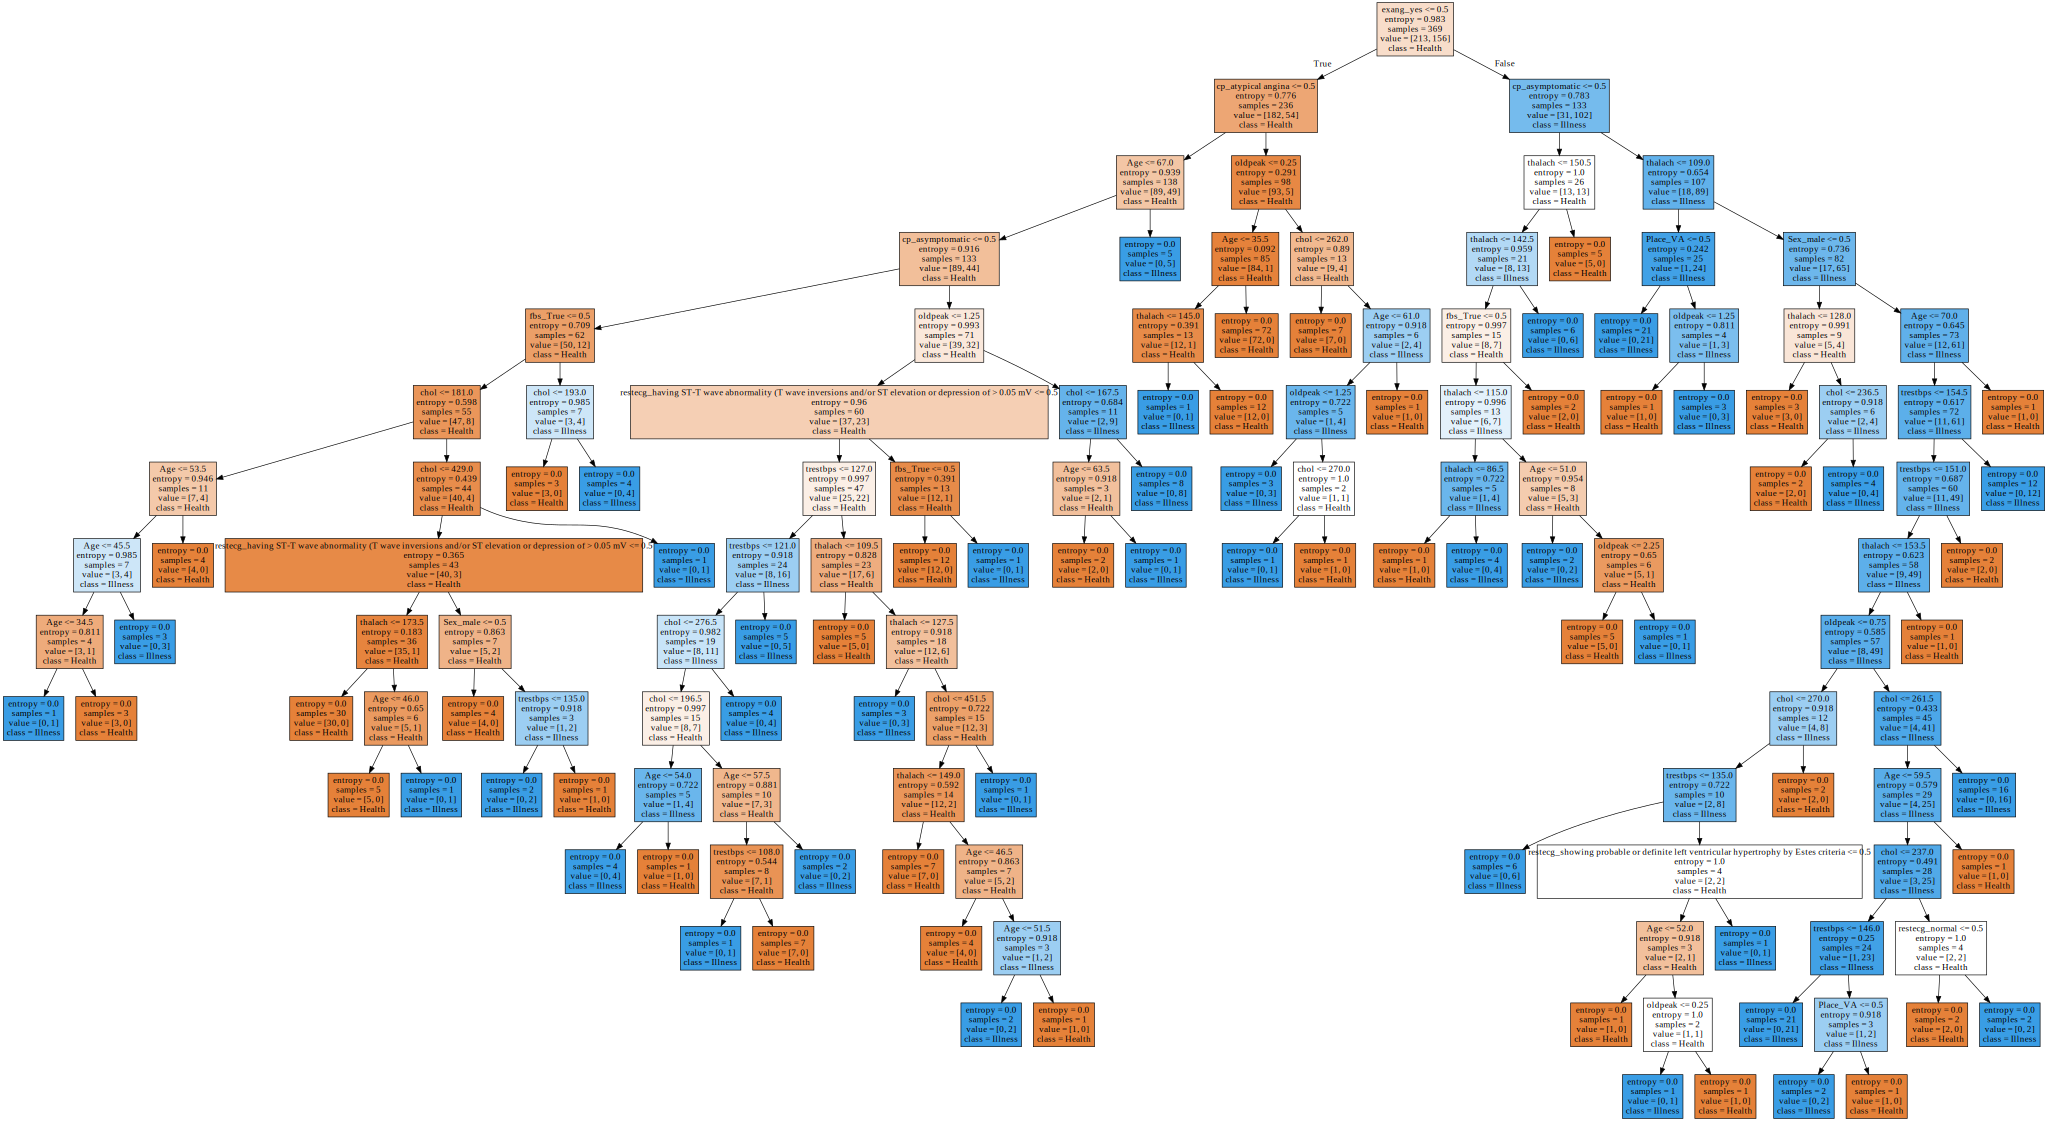

In [52]:
style = "<style>svg{width:10% !important;height:10% !important;}</style>"
HTML(style)
graph = Source(tree.export_graphviz(tree_of_hearts, out_file=None
   , feature_names=list(x), class_names=['Health', 'Illness'] 
   , filled = True))

display(SVG(graph.pipe(format='svg')))

In [53]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

In [54]:
tree_of_hearts.fit(x_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [55]:
tree_of_hearts.score(x_train, y_train)

1.0

In [67]:
tree_of_hearts.score(x_test, y_test)

0.7868852459016393

In [ ]:
#Поиграемся с глубиной дерева

In [68]:
tree_of_hearts_3 = tree.DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [69]:
tree_of_hearts_3.fit(x_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [70]:
tree_of_hearts_3.score(x_train, y_train)

0.7975708502024291

In [71]:
tree_of_hearts_3.score(x_test, y_test)

0.7868852459016393

In [72]:
tree_of_hearts_4 = tree.DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [73]:
tree_of_hearts_4.fit(x_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [74]:
tree_of_hearts_4.score(x_train, y_train)

0.8137651821862348

In [75]:
tree_of_hearts_4.score(x_test, y_test)

0.7704918032786885

In [76]:
tree_of_hearts_5 = tree.DecisionTreeClassifier(criterion='entropy', max_depth=5)

In [77]:
tree_of_hearts_5.fit(x_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [78]:
tree_of_hearts_5.score(x_train, y_train)

0.8340080971659919

In [79]:
tree_of_hearts_5.score(x_test, y_test)

0.7786885245901639

In [80]:
tree_of_hearts_6 = tree.DecisionTreeClassifier(criterion='entropy', max_depth=6)

In [81]:
tree_of_hearts_6.fit(x_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=6,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [82]:
tree_of_hearts_6.score(x_train, y_train)

0.8744939271255061

In [83]:
tree_of_hearts_6.score(x_test, y_test)

0.7868852459016393